In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import h5py

from data_utils import *
from viz_utils import *
from numpy.lib.stride_tricks import as_strided

### Extracting data

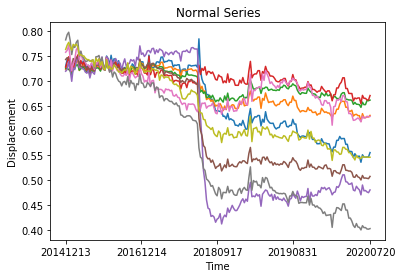

In [2]:
training_data = dict()

# Read data
path = '/Users/cendon/Desktop/Volcano Anomaly/volcano_data/aria-data/galapagos_201412-202007-1/timeseries_demErr.h5'
data, dates = read_data(path)

active_range = (1365, 1425), (640, 721) # Coordinates of volcano active region
outer_range  = (1265, 1526), (539, 821) # Width and Height of this region need to be multiple of the grid size used in function "extract_training_data" (grid_size=3 by default)
training_data['sierra negra'] = dict()
training_data['sierra negra']['dates'] = dates 
extr_series = extract_training_data(data, active_range, outer_range)

extr_reshp = []
for j in range(extr_series.shape[1]):
    for i in range(extr_series.shape[2]):
        serie = extr_series[:, j, i]
        assert (len(dates) == serie.shape[0])
        extr_reshp.append(serie)
extr_reshp = np.array(extr_reshp)

plot_data = {'series' : extr_reshp,
             'dates' : dates,
             'label' : None,
             'id' : "sierra negra"}

# Reshape to 3D format expected by LSTM: [samples, timesteps, features]
extr_reshp = extr_reshp.reshape(len(dates), len(extr_reshp))
training_data['sierra negra']['series'] = np.expand_dims(extr_reshp, axis=0)

plot_1dseries(plot_data, dates)

pickle.dump(training_data, open('training_data.p', 'wb'))